<a href="https://colab.research.google.com/github/shinanna/Tripadvisor_NLP_Analysis/blob/main/Tripadvisor_NLP_Filter_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tripadvisor NLP Filter | Data preparation

## Imports

The latest version of Matplotlib is needed to plot graphs with value labels. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

In [2]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [1]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 895 kB 39.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
# set plot parameters
sns.set_theme(style="darkgrid", palette="crest")

In [4]:
# import dataset from github
url = 'https://raw.githubusercontent.com/shinanna/Tripadvisor_NLP_Analysis/main/datasets/Tripadvisor_Septime.csv'
data = pd.read_csv(url)

## Data cleaning

In [5]:
# check dataset
data.head()

,rev_title,author,author_reviews,ratingdate,text,visitdate,likes,rating
0,Affordable and Comfortable for an Excellent Meal,kevinboss816,5 reviews,"Reviewed September 15, 2021",NaN,Date of visit: September 2021,NaN,5
1,great for vegetarians,Turner S,762 reviews,"Reviewed August 14, 2021",Have been lucky enough to enjoy their food a f...,Date of visit: July 2021,NaN,4
2,Spend your money somewhere else.,758shelinas,24 reviews,"Reviewed August 6, 2021",We have visited Septime last Tuesday after wai...,Date of visit: August 2021,2,1
3,Spectacular - our high expectations were met,bluesky2020a,82 reviews,"Reviewed July 27, 2020",We got a reservation at Septime a couple of mo...,Date of visit: July 2020,1,5
4,Groumet as I'm used to,Sinyanchway,4 reviews,"Reviewed March 10, 2020",We were invited here by our business parter an...,Date of visit: February 2020,3,5


In [6]:
# check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rev_title       372 non-null    object
 1   author          372 non-null    object
 2   author_reviews  120 non-null    object
 3   ratingdate      372 non-null    object
 4   text            330 non-null    object
 5   visitdate       359 non-null    object
 6   likes           227 non-null    object
 7   rating          372 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 23.4+ KB


### Missing values

In [7]:
# check missing values
data.isna().sum()

rev_title           0
author              0
author_reviews    252
ratingdate          0
text               42
visitdate          13
likes             145
rating              0
dtype: int64

In [8]:
# drop text missing values
data.dropna(subset=['text'], inplace=True)
data.text.isna().sum()

0

In [9]:
# replace likes missing values by 0
data['likes'].fillna(0, inplace=True)
data.likes.isna().sum()

0

### Datatype conversion

In [10]:
# check convertible object datatype
data.dtypes

rev_title         object
author            object
author_reviews    object
ratingdate        object
text              object
visitdate         object
likes             object
rating             int64
dtype: object

In [11]:
# clean columns to convert to numeric
data['author_reviews'] = data['author_reviews'].str.replace(' reviews', '')
data['author_reviews'] = data['author_reviews'].str.replace(' review', '')

data['author_reviews'].fillna(0, inplace=True)
data['author_reviews'].isna().sum()

0

In [12]:
# convert columns with numbers to numeric dtype
data['author_reviews'] = pd.to_numeric(data['author_reviews'], errors='coerce')
data.dropna(subset=['author_reviews'], inplace=True)
data['author_reviews'] = data['author_reviews'].astype('int')

data['likes'] = data['likes'].astype('int')

data.dtypes

rev_title         object
author            object
author_reviews     int64
ratingdate        object
text              object
visitdate         object
likes              int64
rating             int64
dtype: object

In [13]:
# extract dates from strings and convert to datetime formats 
data['ratingdate'] = data['ratingdate'].str.replace('Reviewed ', '')
data['ratingdate'] = pd.to_datetime(data['ratingdate'])

data['visitdate'] = data['visitdate'].str.replace('Date of visit: ', '')
data['visitdate'] = pd.to_datetime(data['visitdate'])

data.dtypes

rev_title                 object
author                    object
author_reviews             int64
ratingdate        datetime64[ns]
text                      object
visitdate         datetime64[ns]
likes                      int64
rating                     int64
dtype: object

In [14]:
# replace missing values from visitdate by ratingdate of same index
data['visitdate'].fillna(data['ratingdate'], inplace=True)

# assign visitdate older than ratingdate
data['visitdate'] = np.where(data['visitdate']<data['ratingdate'], data['visitdate'], data['ratingdate'])

data.visitdate.isna().sum()

0

In [15]:
# check if dataset is clean of missing values
data.isna().sum()

rev_title         0
author            0
author_reviews    0
ratingdate        0
text              0
visitdate         0
likes             0
rating            0
dtype: int64

In [16]:
# drop duplicates if any
data.duplicated().any()

False

In [17]:
# check clean dataset head
data.head()

,rev_title,author,author_reviews,ratingdate,text,visitdate,likes,rating
1,great for vegetarians,Turner S,762,2021-08-14,Have been lucky enough to enjoy their food a f...,2021-07-01,0,4
2,Spend your money somewhere else.,758shelinas,24,2021-08-06,We have visited Septime last Tuesday after wai...,2021-08-01,2,1
3,Spectacular - our high expectations were met,bluesky2020a,82,2020-07-27,We got a reservation at Septime a couple of mo...,2020-07-01,1,5
4,Groumet as I'm used to,Sinyanchway,4,2020-03-10,We were invited here by our business parter an...,2020-02-01,3,5
5,"If you can get a table, you're in for the meal...",Sophie F,31,2020-02-21,"Took me years to secure a reservation, but it ...",2020-02-01,2,5


## Exploratory Data Analysis

Encoding the dataset doesn't make much sense here because the categorical columns left are unique text features. Let's explore numeric and datetime columns instead.

### Numeric Data Analyses

In [18]:
# process basic statistics on numeric columns
data.describe()

,author_reviews,likes,rating
count,329.000000,329.000000,329.000000
mean,18.662614,1.340426,4.349544
std,73.266336,1.999903,1.022316
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,1.000000,5.000000
75%,0.000000,2.000000,5.000000
max,783.000000,20.000000,5.000000


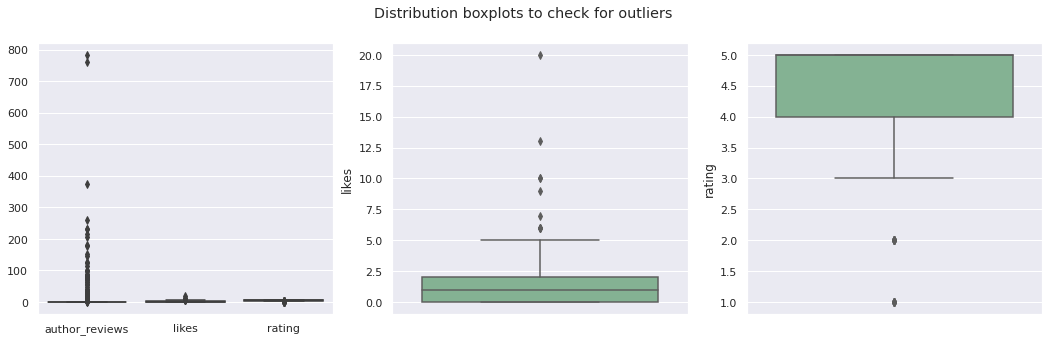

In [19]:
# check for any outliers
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=data, ax=ax1)
sns.boxplot(y=data.likes, ax=ax2)
sns.boxplot(y=data.rating, ax=ax3)
fig.suptitle('Distribution boxplots to check for outliers')

plt.show()

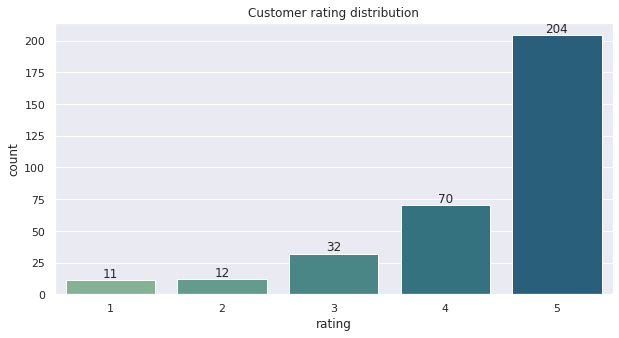

In [20]:
# rating distribution (out of 5)
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=data, x='rating', ax=ax)
ax.bar_label(ax.containers[0])
ax.set_title('Customer rating distribution')

plt.show()

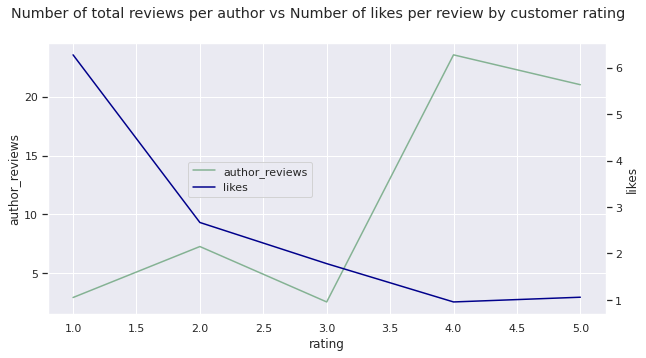

In [21]:
# see ratings by author's 'influence' rate
influence = data.groupby('rating')[['author_reviews', 'likes']].mean()

fig, ax1 = plt.subplots(figsize=(10, 5))

with sns.axes_style("dark"):
  sns.lineplot(x='rating', y='author_reviews', data=influence, ax=ax1, color='#84b293')
  ax2 = ax1.twinx()
  sns.lineplot(x='rating', y='likes', data=influence, ax=ax2, color='darkblue')
  fig.legend(labels=['author_reviews', 'likes'], loc='right', bbox_to_anchor=(0.5, 0.5))

fig.suptitle('Number of total reviews per author vs Number of likes per review by customer rating')
plt.show()

Higher ratings are also given by most active contributers (who have posted more than 40 reviews overall). Although likes are not a reliable metrics due to lack of inputs, there seems to be a negative colinearity with rating: negative feedbacks could also tend to be more supported. 

### Time Analyses

Visit dates and rating dates distribution should be similar but some visit dates have been computed when rating dates are automatically filled. Let's focus on rating date only for further EDA, assuming the rating is filled shortly after the visit.

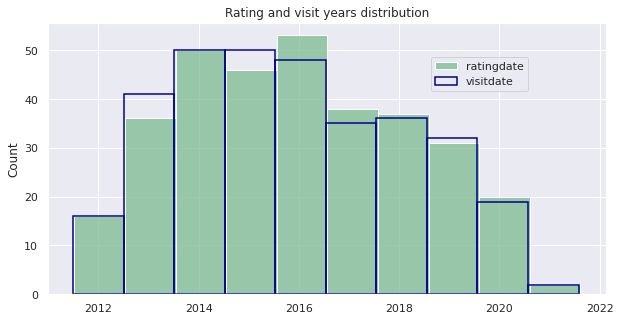

In [22]:
# compare visitdate and ratingdate distributions
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(data=data, x='ratingdate', ax=ax)
sns.histplot(data=data, x='visitdate', ax=ax, fill=False, color='darkblue')
ax.set(xlabel=None)
ax.set_title('Rating and visit years distribution')
fig.legend(labels=['ratingdate', 'visitdate'], loc='upper right', bbox_to_anchor=(0.8, 0.8))

plt.show()

The distribution of rating dates is bimodal: there is a noticeable peak in ratings in 2014, when the restaurant gets a first Michelin-star, and then in 2016, when it enters The World’s 50 Best Restaurants. 

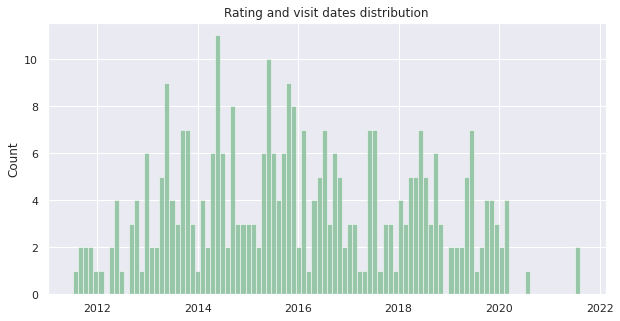

In [23]:
# plot restaurant visit evolution since opening
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(data=data, x='ratingdate', ax=ax, bins=100)
ax.set(xlabel=None)
ax.set_title('Rating and visit dates distribution')

plt.show()

Confinings in France are visible in the 2020-2021 period, it seems wise to exclude this period when processing time-related statistics. 

In [24]:
# add ratingdate weekday column to dataset
data['weekday'] = data['ratingdate'].dt.day_name()
data['month'] = data['ratingdate'].dt.month_name()
data.head()

,rev_title,author,author_reviews,ratingdate,text,visitdate,likes,rating,weekday,month
1,great for vegetarians,Turner S,762,2021-08-14,Have been lucky enough to enjoy their food a f...,2021-07-01,0,4,Saturday,August
2,Spend your money somewhere else.,758shelinas,24,2021-08-06,We have visited Septime last Tuesday after wai...,2021-08-01,2,1,Friday,August
3,Spectacular - our high expectations were met,bluesky2020a,82,2020-07-27,We got a reservation at Septime a couple of mo...,2020-07-01,1,5,Monday,July
4,Groumet as I'm used to,Sinyanchway,4,2020-03-10,We were invited here by our business parter an...,2020-02-01,3,5,Tuesday,March
5,"If you can get a table, you're in for the meal...",Sophie F,31,2020-02-21,"Took me years to secure a reservation, but it ...",2020-02-01,2,5,Friday,February


In [25]:
# select a subdataset for precovid reviews
pre_data = data[data['ratingdate'] < '2020-03-14']
pre_data.ratingdate.max()

Timestamp('2020-03-10 00:00:00')

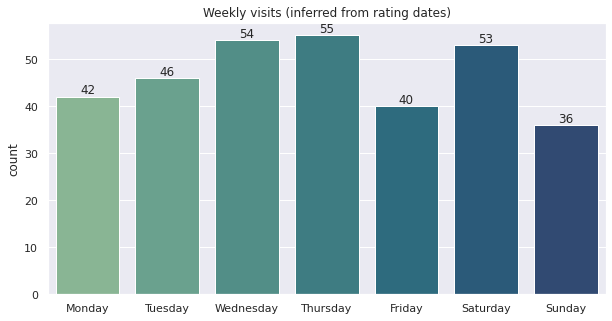

In [26]:
# plot restaurant rating peak times according to weekday
fig, ax = plt.subplots(figsize=(10, 5))

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='weekday', data=pre_data, order=order, palette='crest')
ax.set(xlabel=None)
ax.bar_label(ax.containers[0])
ax.set_title('Weekly visits (inferred from rating dates)')

plt.show()

This restaurant closes on weekends, so there is no way the ratings are all written on the day of the visit. However, we can observe a growing trend from Monday to Thursday, and we can assume most of Friday's ratings are written sometime during the weekend. 

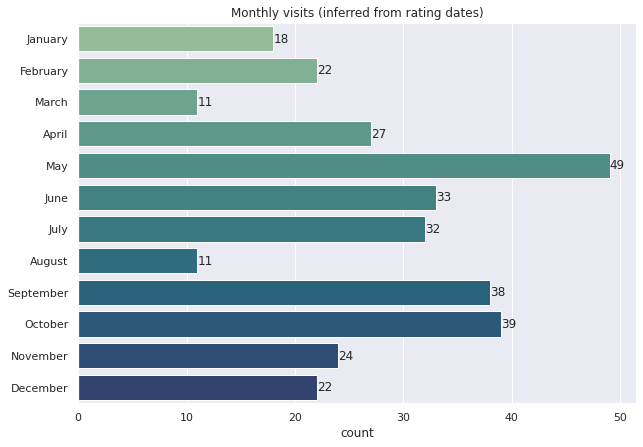

In [27]:
# plot restaurant visit distribution accross months
fig, ax = plt.subplots(figsize=(10, 7))

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(y='month', data=pre_data, order=order, palette='crest')
ax.set(ylabel=None)
ax.bar_label(ax.containers[0])
ax.set_title('Monthly visits (inferred from rating dates)')

plt.show()

## Exports

In [28]:
data.to_csv('Tripadvisor_Septime_clean.csv', index=False) 
files.download('Tripadvisor_Septime_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>